In [21]:
# %pip install wandb

In [1]:
import matplotlib.pyplot as plt
from read_wandb import wandb_results

In [2]:
project_name = 'NLP_project' # enter project name here
username = 'nitzan-manor' # enter group name here

api = wandb_results(project_name, wandb_username=username)

BASE_METRIC = "accuracy_per_mean_user_and_bot"


# for phase 3:

In [3]:
sweep_id = ['enby6lto', 'fqqsn168', 's7mw5paw']  # 20 epochs

dff = []
for sweep in sweep_id:
    dff.append(api.get_sweeps_results([sweep], metric="accuracy_per_mean_user_and_bot"))

Total number of sweeps: 1
Download sweep_id='enby6lto' data...
Total number of sweeps: 1
Download sweep_id='fqqsn168' data...
Total number of sweeps: 1
Download sweep_id='s7mw5paw' data...


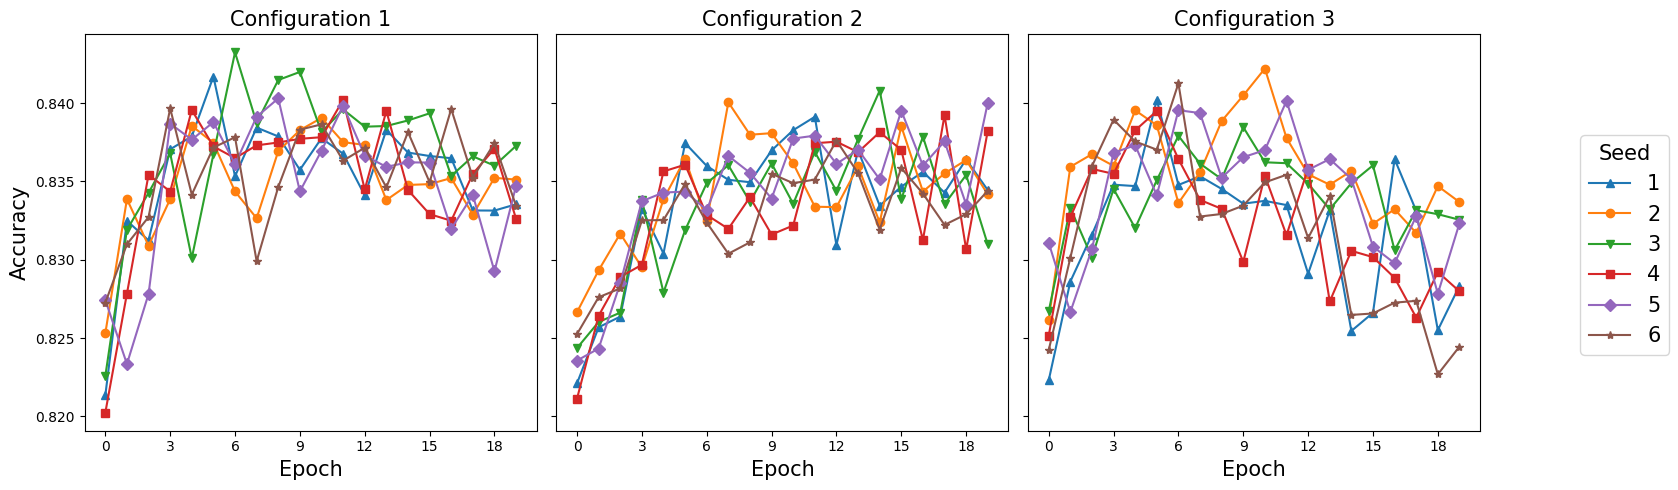

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for idx, df in enumerate(dff):
    epoch_acc = [f'ENV_Test_accuracy_per_mean_user_and_bot_epoch{i}' for i in range(20)]
    cols_to_keep = epoch_acc + ['config_use_fc','config_use_positional_encoding','config_use_residuals','config_dropout','config_seed']
    df = df[cols_to_keep]

    result = df.groupby(['config_use_fc','config_use_positional_encoding','config_use_residuals','config_seed']).mean().reset_index()
    result = result[epoch_acc]

    for i in range(6):
        ax = axs[idx]
        ax.plot(range(20), result.iloc[i], label=str(i+1), marker=['^', 'o', 'v', 's', 'D', '*'][i])

    ax.set_xlabel('Epoch', fontsize=15)
    if idx == 0:
        ax.set_ylabel('Accuracy', fontsize=15)
    ax.set_title(f'Configuration {idx+1}', fontsize=15)

    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Adding shared legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.05, 0.5), title='Seed', fontsize=15, title_fontsize=15)

plt.tight_layout()
plt.show()

# for phase 2:

In [10]:
sweep_id = '5zm9l5xg' 
df = api.get_sweeps_results([sweep_id], metric="accuracy_per_mean_user_and_bot")

Total number of sweeps: 1
Download sweep_id='5zm9l5xg' data...


In [11]:
epoch_acc = [f'ENV_Test_accuracy_per_mean_user_and_bot_epoch{i}' for i in range(10)]
cols_to_keep = epoch_acc + ['config_use_fc','config_use_positional_encoding','config_use_residuals','config_dropout','config_seed', 'config_loss']
df = df[cols_to_keep]

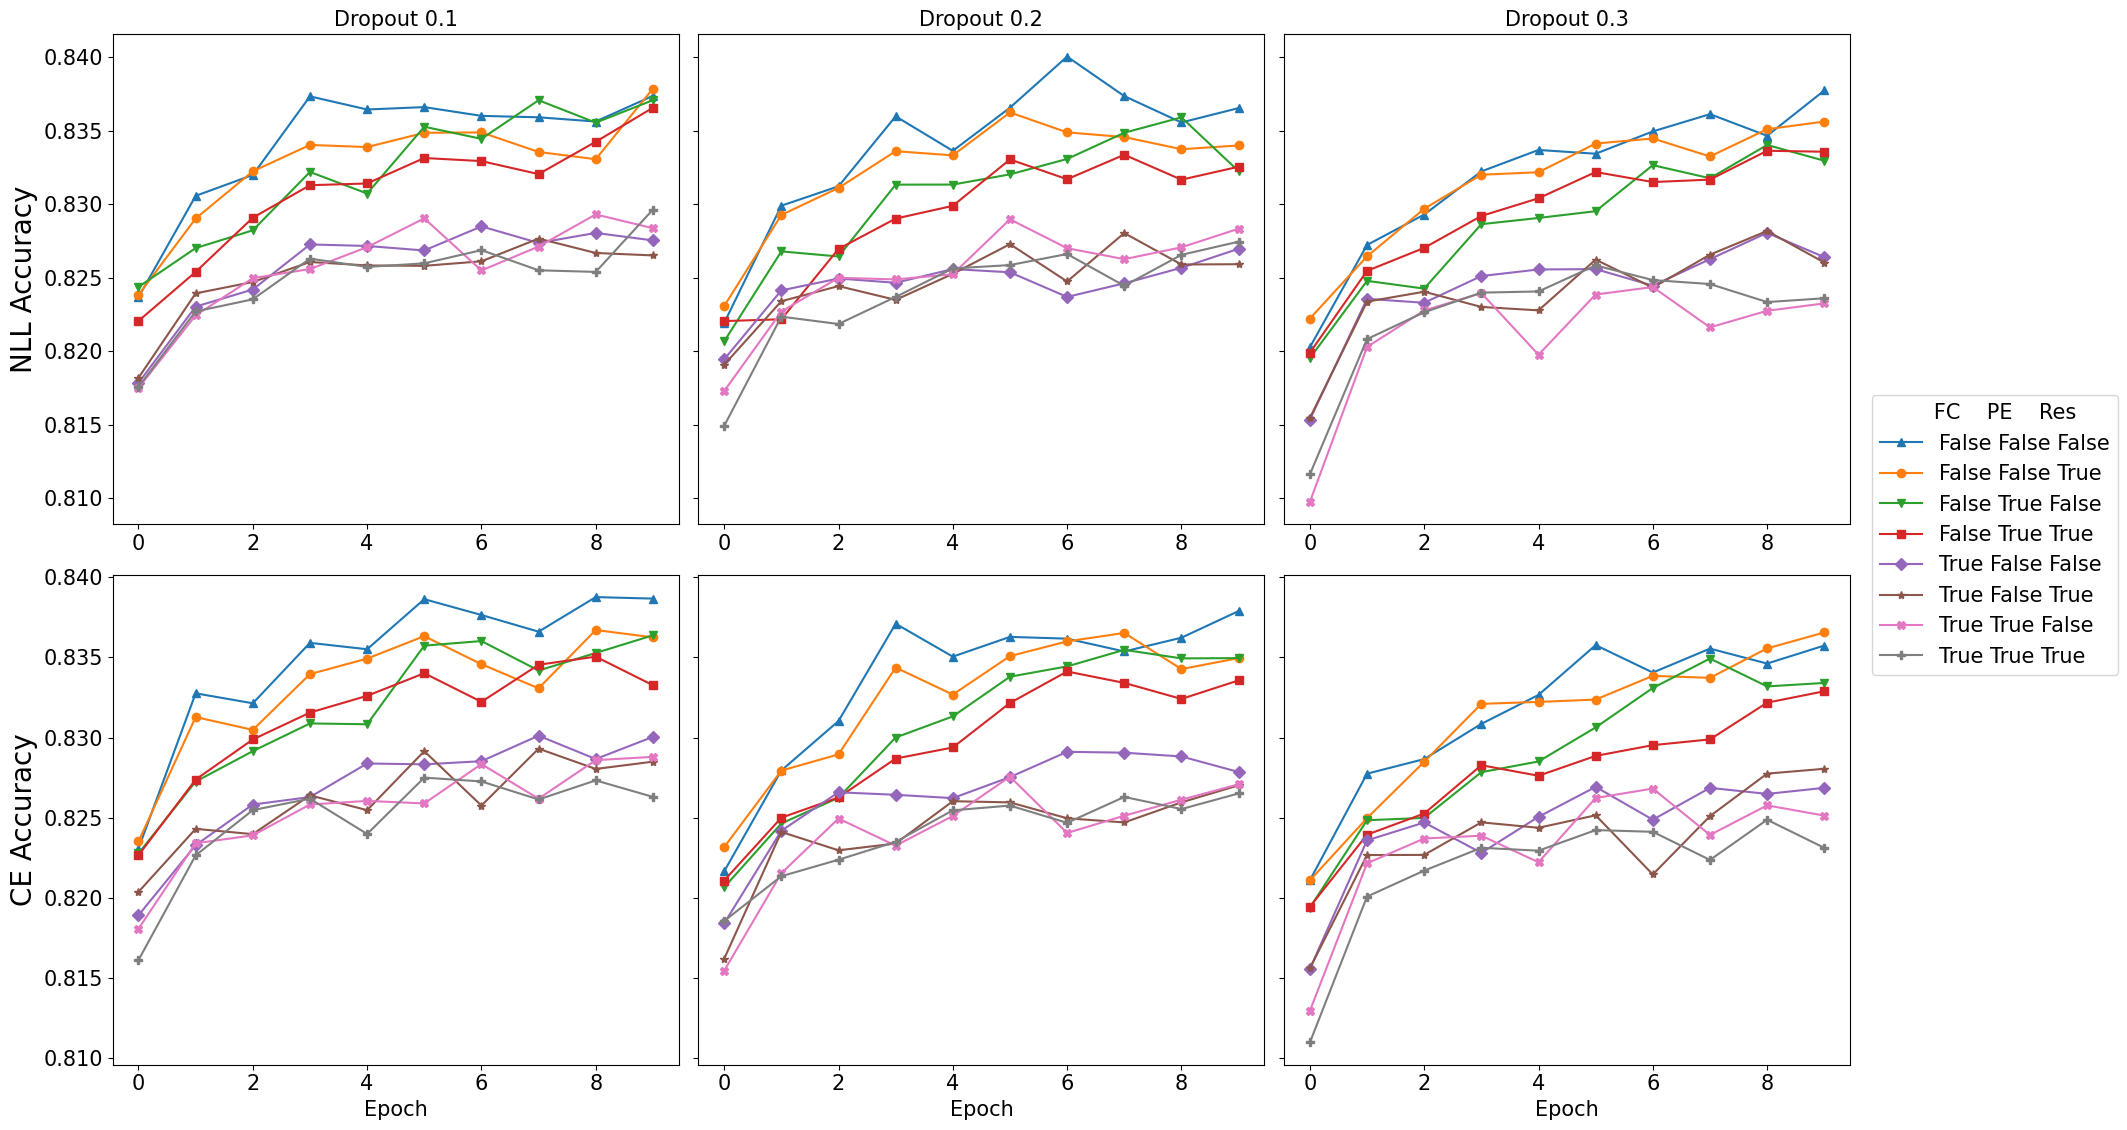

In [12]:
import matplotlib.pyplot as plt

results_nll = []
results_ce = []

# Separate data based on loss type
for i in [1, 2, 3]:
    nll_data = df[(df['config_dropout'] == i/10) & (df['config_loss'] == 'NLL')]
    ce_data = df[(df['config_dropout'] == i/10) & (df['config_loss'] == 'CE')]
    results_nll.append(nll_data.groupby(['config_use_fc', 'config_use_positional_encoding', 'config_use_residuals', 'config_loss']).mean().reset_index())
    results_ce.append(ce_data.groupby(['config_use_fc', 'config_use_positional_encoding', 'config_use_residuals', 'config_loss']).mean().reset_index())
    results_nll[i-1] = results_nll[i-1][epoch_acc]
    results_ce[i-1] = results_ce[i-1][epoch_acc]

fig, axes = plt.subplots(2, 3, figsize=(20, 12), sharey='row')

# Store the lines and labels for the legend
lines_labels = []

# Plot NLL loss (top row)
for i, result in enumerate(results_nll):
    ax = axes[0, i]
    one = result.iloc[0]
    two = result.iloc[1]
    three = result.iloc[2]
    four = result.iloc[3]
    five = result.iloc[4]
    six = result.iloc[5]
    seven = result.iloc[6]
    eight = result.iloc[7]
    x_axis = range(10)
    lines = ax.plot(x_axis, one, label='False False False', marker='^')
    lines += ax.plot(x_axis, two, label='False False True', marker='o')
    lines += ax.plot(x_axis, three, label='False True False', marker='v')
    lines += ax.plot(x_axis, four, label='False True True', marker='s')
    lines += ax.plot(x_axis, five, label='True False False', marker='D')
    lines += ax.plot(x_axis, six, label='True False True', marker='*')
    lines += ax.plot(x_axis, seven, label='True True False', marker='X')
    lines += ax.plot(x_axis, eight, label='True True True', marker='P')
    if i == 0:
        ax.set_ylabel('NLL Accuracy', fontsize=20)
    ax.set_title(f'Dropout {(i+1)/10}', fontsize=15)
    if i == 0:
        lines_labels = lines

# Plot CE loss (bottom row)
for i, result in enumerate(results_ce):
    ax = axes[1, i]
    one = result.iloc[0]
    two = result.iloc[1]
    three = result.iloc[2]
    four = result.iloc[3]
    five = result.iloc[4]
    six = result.iloc[5]
    seven = result.iloc[6]
    eight = result.iloc[7]
    x_axis = range(10)
    lines = ax.plot(x_axis, one, label='False False False', marker='^')
    lines += ax.plot(x_axis, two, label='False False True', marker='o')
    lines += ax.plot(x_axis, three, label='False True False', marker='v')
    lines += ax.plot(x_axis, four, label='False True True', marker='s')
    lines += ax.plot(x_axis, five, label='True False False', marker='D')
    lines += ax.plot(x_axis, six, label='True False True', marker='*')
    lines += ax.plot(x_axis, seven, label='True True False', marker='X')
    lines += ax.plot(x_axis, eight, label='True True True', marker='P')
    if i == 0:
        ax.set_ylabel('CE Accuracy', fontsize=20)
    ax.set_xlabel('Epoch', fontsize=15)

for ax in axes.flat:
    ax.yaxis.set_tick_params(labelsize=15)
    ax.xaxis.set_tick_params(labelsize=15)

# Add one legend for all plots
fig.legend(lines_labels, [line.get_label() for line in lines_labels], loc='center', bbox_to_anchor=(1, 0.5), title='   FC    PE    Res', fontsize=15, title_fontsize=15)

plt.tight_layout(rect=[0, 0, 0.935, 0.95]) 
plt.show()
